
ans =

    '9.8.0.1417392 (R2020a) Update 4'

a =
  Columns 1 through 13
     1     2     3     4     5     6     7     8     9    10    11    12    13
  Columns 14 through 20
    14    15    16    17    18    19    20
ans =
   1.0e+02 *
  Columns 1 through 4
   2.1000 + 0.0000i  -0.1000 + 0.6314i  -0.1000 + 0.3078i  -0.1000 + 0.1963i
  Columns 5 through 8
  -0.1000 + 0.1376i  -0.1000 + 0.1000i  -0.1000 + 0.0727i  -0.1000 + 0.0510i
  Columns 9 through 12
  -0.1000 + 0.0325i  -0.1000 + 0.0158i  -0.1000 + 0.0000i  -0.1000 - 0.0158i
  Columns 13 through 16
  -0.1000 - 0.0325i  -0.1000 - 0.0510i  -0.1000 - 0.0727i  -0.1000 - 0.1000i
  Columns 17 through 20
  -0.1000 - 0.1376i  -0.1000 - 0.1963i  -0.1000 - 0.3078i  -0.1000 - 0.6314i


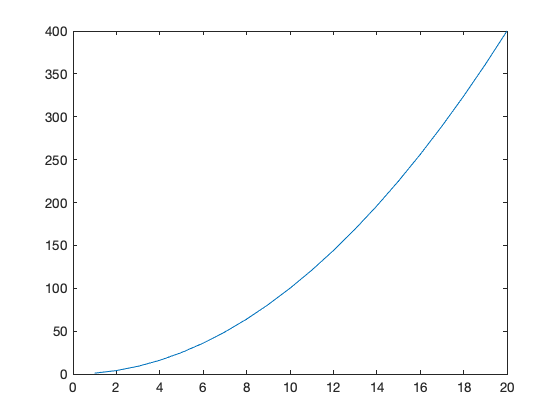

In [1]:
format compact
a=1:20
fft(a)
figure;
plot(a,a.^2)

# This is the Dynamic FC sample code

In [15]:
help plot

 PLOT   Linear plot. 
    PLOT(X,Y) plots vector Y versus vector X. If X or Y is a matrix,
    then the vector is plotted versus the rows or columns of the matrix,
    whichever line up.  If X is a scalar and Y is a vector, disconnected
    line objects are created and plotted as discrete points vertically at
    X.
 
    PLOT(Y) plots the columns of Y versus their index.
    If Y is complex, PLOT(Y) is equivalent to PLOT(real(Y),imag(Y)).
    In all other uses of PLOT, the imaginary part is ignored.
 
    Various line types, plot symbols and colors may be obtained with
    PLOT(X,Y,S) where S is a character string made from one element
    from any or all the following 3 columns:
 
           b     blue          .     point              -     solid
           g     green         o     circle             :     dotted
           r     red           x     x-mark             -.    dashdot 
           c     cyan          +     plus               --    dashed   
           m     magenta    

In [2]:
tx = linspace (-8, 8, 41);
ty = tx;
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;

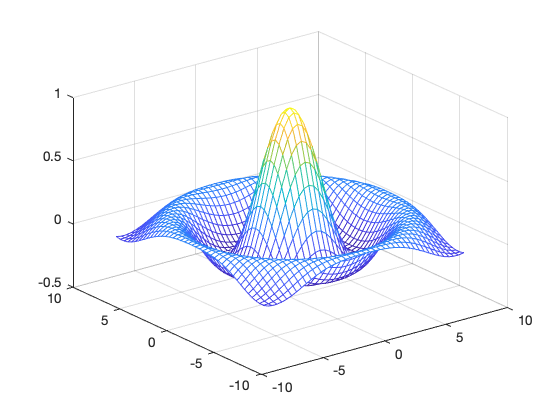

In [3]:
%plot inline
mesh(tx, ty, tz);

In [19]:
?%plot

In [4]:
%plot native
mesh(tx, ty, tz);

In [21]:
%%file dynamic.m
function [dynmat,dynmatsd]=dynamic(inputmat, window,step, motioncovar)
% assume inputmat is parcel x time (TRs)matrx or a txt file contains the matrix
%  slide window is 1 TR or anything
%motioncovar is the 1xtime vector such as FD vector can also be a txt file,
%or fmriprep output
%sub-DCNLRDOC002_task-SocStroop1_desc-confounds_regressors.tsv
%contains the values
% example input
inputmat=rand(400,180);
motioncovar=rand(1,180);
%motioncovar='sub-DCNLRDOC004_task-rest_desc-confounds_regressors.tsv';
window=10;
step=1;
% Xiaozhen You 2021 September 10
if ischar(inputmat)
    inputmat=load(inputmat);
end
if ischar(motioncovar)
    if strcmp(motioncovar(end-2:end),'tsv')
        motioncovar=readtable(motioncovar,'FileType','text');
        motioncovar=motioncovar.framewise_displacement;
        motioncovar(1)=0;
        
    else
        motioncovar=load(motioncovar);
    end
end
totalwindownumber=round((size(inputmat,2)-window)/step);
parcelnumber=size(inputmat,1);

dynmat=zeros(parcelnumber,parcelnumber,totalwindownumber);
dynmatsd=zeros(parcelnumber,parcelnumber);
motionmat=zeros(totalwindownumber,1);
for ti=1:totalwindownumber
    
    selmat=inputmat(:,(ti-1)*step+1:(ti-1)*step+window);
    dynmat(:,:,ti)=corrcoef(selmat');
    
    motionmat(ti)=mean(motioncovar((ti-1)*step+1:(ti-1)*step+window));
end

% regress out motion car
for pari=1:parcelnumber
    for parj=1:parcelnumber
        dynmat(pari,parj,:)=regress(squeeze(dynmat(pari,parj,:)),motionmat);
        dynmatsd(pari,parj)=std(dynmat(pari,parj,:));
    end
end
figure;imagesc(dynmatsd);

end


Created file '/Users/xyou/OneDrive - Children's National Hospital/DynamicFC/dynamic.m'.


In [5]:
[dynmat,dynmatsd]=dynamic;

In [7]:
addpath(genpath('/Users/xyou/Dropbox/Script_share/spm12/toolbox/xjview'))
addpath('/Users/xyou/Dropbox/Script_share/spm12/')
xjview

In [8]:
spm fmri

 ___  ____  __  __                                            
/ __)(  _ \(  \/  )                                           
\__ \ )___/ )    (   Statistical Parametric Mapping           
(___/(__)  (_/\/\_)  SPM12 - https://www.fil.ion.ucl.ac.uk/spm/


SPM12: v7487                                       14:02:09 - 29/09/2021
Initialising SPM                        :                   ......Warning: JAVACOMPONENT will be removed in a future release. For more information see <a href="https://www.mathworks.com/products/matlab/app-designer/java-swing-alternatives.html">UI Alternatives for MATLAB Apps</a> onmathworks.com.
> In javacomponent (line 85)
  In spm_browser (line 58)
  In spm_help (line 129)
  In spm (line 352)
..done

SPM present working directory:
	/Users/xyou/OneDrive - Children's National Hospital/DynamicFC


$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$



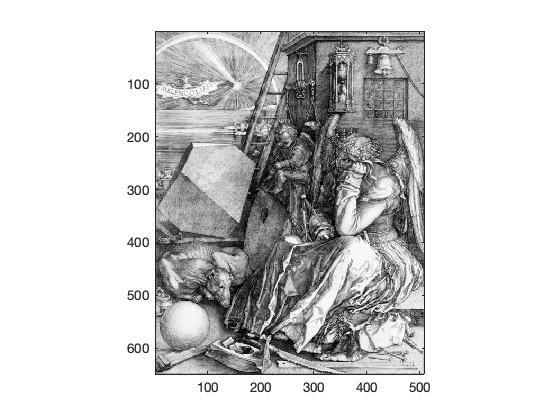

In [8]:
load durer
image(X)
colormap(map)
axis image
